# Descriptive Statistics on Beauty Features

In [1]:
import pandas as pd
import json 
import seaborn as sns
from scipy import stats

In [2]:
with open('../sleeping_coeff/bcoefficients13358.json') as json_file: 
    data = json.load(json_file)

In [3]:
df = pd.DataFrame(data.values(), 
                  columns=['case_id', 'bcoefficient', 'publication_year', 'total_citations', 'max_citations_in_a_year', 'max_citation_year', 'awakening_time_year', 'sleep_time_years', 'time_from_awakening_to_peak_years'])
# time_from_awakening_to_peak_years = Number of years after publication to get to the year with maximum number of citations
df.bcoefficient = df.bcoefficient.astype(float)
for c in df.columns[2:]:
    df[c] = df[c].astype(int)

#### Variables Dependency
- bcoefficient <- all
- sleep_time_years <- awakening_time_year - publication_year
- publication_year <- independent
- total_citations <- independent
- time_from_awakening_to_peak_years <- max_citation_year - awakening_time_year
- max_citation_year <- independent
- max_citations_in_a_year <- independent
- peak_year_relative_importance <- max_citations_in_a_year / total_citations (the closest to one the more important that year was)
- sleep_to_peak_ratio <- time_from_awakening_to_peak_years / sleep_time_years (ratio, if greater that one then it take more time for peak year than to be awakened, the closer to 0 the fastest)
- ? Increase ratio
- ? Decrease ratio
- ? Peak decade

In [4]:
df['peak_year_relative_importance'] = df['max_citations_in_a_year']/df['total_citations']
df['sleep_to_peak_ratio'] = df['time_from_awakening_to_peak_years']/df['sleep_time_years']

In [5]:
df.head()

,case_id,bcoefficient,publication_year,total_citations,max_citations_in_a_year,max_citation_year,awakening_time_year,sleep_time_years,time_from_awakening_to_peak_years,peak_year_relative_importance,sleep_to_peak_ratio
0,61997CJ0147,0.0,2000,1,1,2000,2000,0,0,1.000000,NaN
1,61995CJ0032,10.0,1996,8,2,2000,1997,1,3,0.250000,3.000000
2,61995CJ0067,55.0,1997,2,1,2008,2007,10,1,0.500000,0.100000
3,61994CJ0308,0.0,1996,0,0,1996,1996,0,0,NaN,NaN
4,61998CJ0285,211.0,2000,11,6,2009,2007,7,2,0.545455,0.285714


---
# The total of citations

The beauty coefficient and the calculation of sleep time are dependent on citations, therefore we only account cases with at least one citation

In [6]:
#Accounting only cited cases
df = df[df.total_citations != 0]
df.describe()

/Users/pedrohserrano/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


,bcoefficient,publication_year,total_citations,max_citations_in_a_year,max_citation_year,awakening_time_year,sleep_time_years,time_from_awakening_to_peak_years,peak_year_relative_importance,sleep_to_peak_ratio
count,8979.000000,8979.000000,8979.000000,8979.000000,8979.000000,8979.000000,8979.000000,8979.000000,8979.000000,7521.000000
mean,46.051153,2000.421428,4.765898,1.745851,2004.913799,2003.973382,3.551955,0.940417,0.545945,inf
std,174.232056,12.712683,5.859097,1.350397,10.643870,10.672741,6.220860,0.583153,0.315054,NaN
min,0.000000,1954.000000,1.000000,0.000000,1955.000000,1955.000000,0.000000,0.000000,0.000000,0.018519
25%,0.000000,1992.000000,1.000000,1.000000,1998.000000,1997.000000,0.000000,1.000000,0.300000,0.200000
50%,1.000000,2003.000000,3.000000,1.000000,2008.000000,2007.000000,1.000000,1.000000,0.500000,0.500000
75%,16.833333,2011.000000,6.000000,2.000000,2014.000000,2013.000000,4.000000,1.000000,1.000000,NaN
max,4709.500000,2018.000000,118.000000,17.000000,2019.000000,2018.000000,55.000000,8.000000,1.000000,inf


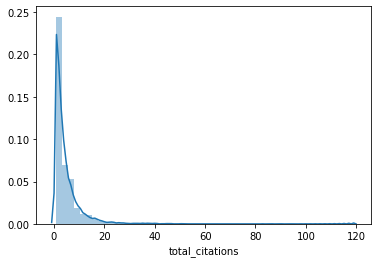

In [7]:
# Citations distribution
sns.distplot(df.total_citations)

Left skewed distribution

#### 1. How many citations is needed to be in the top 10%?

In [8]:
# What is the "number of citations"-value on which the top 10% citations will be above
value = df.total_citations.quantile(0.90)
value

10.0

In [9]:
df['top_cited'] = df.total_citations.apply(lambda x: (1 if x > value else 0))
df.top_cited.sum()

870

#### 2. How many citations in average a case has from the top 10%?

In [10]:
df[df.top_cited == 1].total_citations.mean()

18.27816091954023

---
# The sleep time

In [11]:
# Sleep time distribution
df.sleep_time_years.describe()

count    8979.000000
mean        3.551955
std         6.220860
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        55.000000
Name: sleep_time_years, dtype: float64

#### 3. What is the average sleeping time?

A case sleeps 3.5 (6.22) years before is awakened

In [12]:
df[df.top_cited == 1].sleep_time_years.describe()

count    870.000000
mean       4.320690
std        6.249099
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       55.000000
Name: sleep_time_years, dtype: float64

A case in the top 10% sleeps 4.3 (6.22) years before is awakened

#### 4. Is there a difference on the sleeping time between top cited cases and non-top cited cases?

In [20]:
number_top_cited = len(df[df.top_cited == 1])
df_non_top_sample = df[df.top_cited == 0].sample(n=number_top_cited, random_state=127365)
df_top_cited = df[df.top_cited ==1 ]

In [21]:
print('Average Sleeping time in years \n Top cited cases: {} (SD {}) \n Non-Top cited cases: {} (SD {})'.format(
    round(df_non_top_sample.sleep_time_years.mean(),2), round(df_non_top_sample.sleep_time_years.std(),2), 
    round(df_top_cited.sleep_time_years.mean(),2), round(df_top_cited.sleep_time_years.std(),2))) 

Average Sleeping time in years 
 Top cited cases: 3.42 (SD 6.23) 
 Non-Top cited cases: 4.32 (SD 6.25)


In [22]:
#T-test with different means, variance, and n: for Difference of Groups
# H0: μ1 - μ2 < d
stats.ttest_ind(df_non_top_sample.sleep_time_years, df_top_cited.sleep_time_years, equal_var = False)

Ttest_indResult(statistic=-3.0130406707342736, pvalue=0.002623814832847893)

*Since p is less than 0.05 then H0 is rejected, therefore there is no evidence that the means of the two samples are equal, it means that sleeping time can be less for top cited cases*   
**Yes (the quicker awakening the higher the chances to be high cited?)**

#### 4. Which are the cases with the longer sleep time?

In [23]:
df.sort_values(by='sleep_time_years', ascending =False).head(10)

,case_id,bcoefficient,publication_year,total_citations,max_citations_in_a_year,max_citation_year,awakening_time_year,sleep_time_years,time_from_awakening_to_peak_years,peak_year_relative_importance,sleep_to_peak_ratio,top_cited
7489,61956CJ0009,4709.5,1958,12,3,2015,2013,55,2,0.250000,0.036364,1
4831,61960CJ0006,2965.0,1960,7,2,2015,2014,54,1,0.285714,0.018519,0
4852,61958CJ0019,1326.0,1960,1,1,2012,2011,51,1,1.000000,0.019608,0
4851,61958CJ0003,1326.0,1960,1,1,2012,2011,51,1,1.000000,0.019608,0
4840,61963CJ0069,1326.0,1964,1,1,2016,2015,51,1,1.000000,0.019608,0
12006,61965CO0025,1225.0,1967,1,1,2017,2016,49,1,1.000000,0.020408,0
2362,61965CJ0051,1176.0,1966,1,1,2015,2014,48,1,1.000000,0.020833,0
4847,61960CJ0025,1081.0,1962,1,1,2009,2008,46,1,1.000000,0.021739,0
2351,61967CJ0005,1081.0,1968,1,1,2015,2014,46,1,1.000000,0.021739,0
4778,61962CJ0036,1035.0,1963,1,1,2009,2008,45,1,1.000000,0.022222,0


*The case with max sleep time is 55 years making a total of 12 citations after all*  
Top lazy case: https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1594566429905&uri=CELEX:61956CJ0009

    Judgment of the Court of 13 June 1958. 
    Meroni & Co., Industrie Metallurgiche, SpA v High Authority of the European Coal and Steel Community. 
    Case 9-56.

#### 5. What are the years with more awakenings?

In [24]:
df.groupby('awakening_time_year')\
    .count()['case_id']\
    .sort_values(ascending=False)\
    .reset_index()\
    .rename(columns={'case_id':'cases'})\
    .head(15)

,awakening_time_year,cases
0,2016,504
1,2012,490
2,2015,477
3,2014,473
4,2013,470
5,2011,398
6,2008,384
7,2010,349
8,2009,345
9,2006,332


The very last decade reports the most awakenings

---
# The awakened years

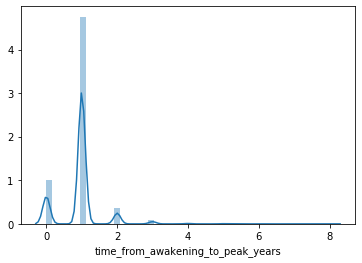

In [32]:
sns.distplot(df.time_from_awakening_to_peak_years, kde_kws={'bw':0.1})

#### 6. What is the expected time in years to get to the most cited years after being awakened?

In [28]:
df.time_from_awakening_to_peak_years.describe()

count    8979.000000
mean        0.940417
std         0.583153
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         8.000000
Name: time_from_awakening_to_peak_years, dtype: float64

**Once a case is awakened within the first year will reach the point of highest number of citations per year.**

#### 7. Is there a difference on the "speed to peak" in years between top cited cases and non-top cited cases?

In [33]:
print('Average Speed to peak in years \n Top cited cases: {} (SD {}) \n Non-Top cited cases: {} (SD {})'.format(
    round(df_non_top_sample.time_from_awakening_to_peak_years.mean(),2), round(df_non_top_sample.time_from_awakening_to_peak_years.std(),2), 
    round(df_top_cited.time_from_awakening_to_peak_years.mean(),2), round(df_top_cited.time_from_awakening_to_peak_years.std(),2))) 

Average Speed to peak in years 
 Top cited cases: 0.88 (SD 0.45) 
 Non-Top cited cases: 1.39 (SD 1.0)


In [34]:
#T-test with different means, variance, and n: for Difference of Groups
# H0: μ1 - μ2 < d
stats.ttest_ind(df_non_top_sample.time_from_awakening_to_peak_years, df_top_cited.time_from_awakening_to_peak_years, equal_var = False)

Ttest_indResult(statistic=-13.637980066476482, pvalue=1.6842927052669453e-39)

*Since p is less than 0.05 then H0 is rejected, therefore there is no evidence that the means of the two samples are equal (the means are statistically different)*   
**Yes (an intuitive result - the more gets cited the quicker it gets to its peak)**

In [36]:
df.peak_year_relative_importance.describe()

count    8979.000000
mean        0.545945
std         0.315054
min         0.000000
25%         0.300000
50%         0.500000
75%         1.000000
max         1.000000
Name: peak_year_relative_importance, dtype: float64

In [42]:
#cases where they get all citations in the year they were awakened
df[df.peak_year_relative_importance==1].sort_values('total_citations',ascending=False).head(10)

,case_id,bcoefficient,publication_year,total_citations,max_citations_in_a_year,max_citation_year,awakening_time_year,sleep_time_years,time_from_awakening_to_peak_years,peak_year_relative_importance,sleep_to_peak_ratio,top_cited
6942,62007CJ0161,30.0,2008,10,10,2011,2010,2,1,1.0,0.500000,0
2795,62013CJ0608,0.0,2016,8,8,2017,2016,0,1,1.0,inf,0
2794,62013CJ0616,0.0,2016,8,8,2017,2016,0,1,1.0,inf,0
3815,62013CJ0531,0.0,2015,6,6,2016,2015,0,1,1.0,inf,0
4355,61995CJ0247,18.0,1997,6,6,2000,1999,2,1,1.0,0.500000,0
1794,61983CJ0049,546.0,1984,6,6,1998,1997,13,1,1.0,0.076923,0
1372,61985CJ0348,275.0,1987,5,5,1998,1997,10,1,1.0,0.100000,0
9201,61999CJ0266,0.0,2001,5,5,2001,2001,0,0,1.0,NaN,0
11583,62016CO0240,0.0,2017,4,4,2017,2017,0,0,1.0,NaN,0
508,62004CJ0408,112.0,2008,4,4,2016,2015,7,1,1.0,0.142857,0


Top case where all its citations came from the same year was awakened: https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1594568525510&uri=CELEX:62007CJ0161

                    Judgment of the Court (First Chamber) of 22 December 2008.
        Commission of the European Communities v Republic of Austria.
        Failure of a Member State to fulfil obligations - Article 43 EC - National legislation laying down the conditions for registration of partnerships or companies on application by nationals of the new Member States - Procedure for certification of self-employed status.
        Case C-161/07.

the saame but with more sleeping time: 61983CJ0049

## The beauty coefficcient

#### Average beauty coefficient per year

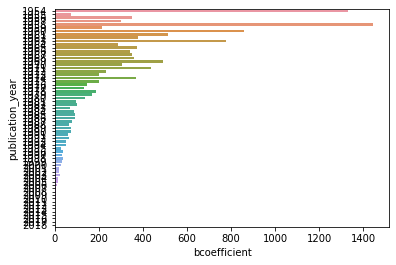

In [9]:
bcoeff_agg = df.groupby('publication_year').mean()['bcoefficient'].reset_index()
sns.barplot(x="bcoefficient", y="publication_year", data=bcoeff_agg, orient="h")

The oldest cases has more chances to be sleeping beauties than the young ones as expected  
This means that is only fair to compare beauty coefficient with cases of their own cohort

#### Variables distributions

Beauty coefficient

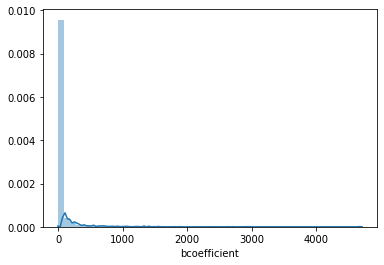

In [21]:
sns.distplot(df.bcoefficient)

In [22]:
# top 5% with at least 1 citation
top5p = df.bcoefficient.quantile(0.95)
top5p

233.20000000000073

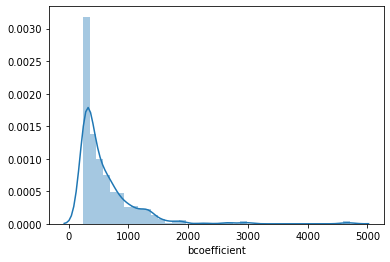

In [24]:
sns.distplot(df[df.bcoefficient > top5p].bcoefficient)

In [25]:
df_top = df[df.bcoefficient > top5p]\
    .sort_values(by=['sleep_time_years','bcoefficient'], ascending=False)\
    .reset_index(drop=True)

In [26]:
df_top.head(20)

,case_id,bcoefficient,publication_year,total_citations,max_citations_in_a_year,max_citation_year,awakening_time_year,sleep_time_years,time_from_awakening_to_peak_years,peak_year_relative_importance,sleep_to_peak_ratio,top_cited
0,61956CJ0009,4709.5,1958,12,3,2015,2013,55,2,0.250000,0.036364,1
1,61960CJ0006,2965.0,1960,7,2,2015,2014,54,1,0.285714,0.018519,0
2,61963CJ0069,1326.0,1964,1,1,2016,2015,51,1,1.000000,0.019608,0
3,61958CJ0003,1326.0,1960,1,1,2012,2011,51,1,1.000000,0.019608,0
4,61958CJ0019,1326.0,1960,1,1,2012,2011,51,1,1.000000,0.019608,0
5,61965CO0025,1225.0,1967,1,1,2017,2016,49,1,1.000000,0.020408,0
6,61965CJ0051,1176.0,1966,1,1,2015,2014,48,1,1.000000,0.020833,0
7,61967CJ0005,1081.0,1968,1,1,2015,2014,46,1,1.000000,0.021739,0
8,61960CJ0025,1081.0,1962,1,1,2009,2008,46,1,1.000000,0.021739,0
9,61962CJ0036,1035.0,1963,1,1,2009,2008,45,1,1.000000,0.022222,0


**Top cited cases and their bcoefficient**

In [43]:
df_top.sort_values('total_citations', ascending=False).head(8)

,case_id,bcoefficient,publication_year,total_citations,max_citations_in_a_year,max_citation_year,awakening_time_year,sleep_time_years,time_from_awakening_to_peak_years,top_cited
169,61974CJ0008,866.900000,1974,90,6,1998,1996,22,2,1
178,61978CJ0120,1231.500000,1979,59,6,2003,2000,21,3,1
253,61981CJ0141,504.000000,1982,45,6,1996,1994,12,2,1
202,61983CJ0270,1814.700000,1986,44,9,2011,2005,19,6,1
39,61962CJ0025,2631.000000,1963,39,4,2001,1999,36,2,1
145,61980CJ0100,1403.333333,1983,38,5,2009,2008,25,1,1
92,61970CJ0022,2984.000000,1971,37,7,2002,2001,30,1,1
215,61980CJ0244,862.333333,1981,36,4,2003,1999,18,4,1


In [46]:
#more cited case with the top b coeff
#https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1592245944223&uri=CELEX:61974CJ0008

In [44]:
df_top.sort_values('sleep_time_years', ascending=False).head(8)

,case_id,bcoefficient,publication_year,total_citations,max_citations_in_a_year,max_citation_year,awakening_time_year,sleep_time_years,time_from_awakening_to_peak_years,top_cited
0,61956CJ0009,4709.5,1958,12,3,2015,2013,55,2,0
1,61960CJ0006,2965.0,1960,7,2,2015,2014,54,1,0
2,61963CJ0069,1326.0,1964,1,1,2016,2015,51,1,0
3,61958CJ0003,1326.0,1960,1,1,2012,2011,51,1,0
4,61958CJ0019,1326.0,1960,1,1,2012,2011,51,1,0
5,61965CO0025,1225.0,1967,1,1,2017,2016,49,1,0
6,61965CJ0051,1176.0,1966,1,1,2015,2014,48,1,0
7,61967CJ0005,1081.0,1968,1,1,2015,2014,46,1,0


In [45]:
#More sleepy case
#https://eur-lex.europa.eu/legal-content/EN/ALL/?uri=CELEX:61956CJ0009&qid=1592245887258

In [20]:
df.head()

,case_id,bcoefficient,publication_year,total_citations,max_citations_in_a_year,max_citation_year,awakening_time_year,sleep_time_years,time_from_awakening_to_peak_years,top_cited
1,61995CJ0032,10.0,1996,8,2,2000,1997,1,3,0
2,61995CJ0067,55.0,1997,2,1,2008,2007,10,1,0
4,61998CJ0285,211.0,2000,11,6,2009,2007,7,2,0
5,61995CJ0001,268.0,1997,6,2,2014,2013,16,1,0
6,61997CJ0126,39.0,1999,8,2,2006,2004,5,2,0


In [28]:
print(df_non_top_sample.bcoefficient.mean(), df_top_cited.bcoefficient.mean())

69.0955934612651 148.80520003569046


In [29]:
stats.ttest_ind(df_non_top_sample.bcoefficient, df_top_cited.bcoefficient, equal_var = False)

Ttest_indResult(statistic=-4.137787125794725, pvalue=3.9479427321364037e-05)

**This might be logical since bcoeff includes the number of citations**

In [30]:
print(df_non_top_sample.time_from_awakening_to_peak_years.mean(), df_top_cited.time_from_awakening_to_peak_years.mean())

1.1343283582089552 1.6801705756929637


In [31]:
stats.ttest_ind(df_non_top_sample.time_from_awakening_to_peak_years, df_top_cited.time_from_awakening_to_peak_years, equal_var = False)

Ttest_indResult(statistic=-10.135748102912363, pvalue=2.2961937340989166e-22)

## Metadata integration

In [32]:
metadata = pd.read_csv('cases_metadata.csv')
subjects = pd.read_csv('subjects.csv')

In [33]:
df_top_metadata = df_top\
    .merge(metadata, how='left', left_on='case_id', right_on='source')\
    .merge(subjects, how='left', left_on='case_id', right_on='source')

In [34]:
df_top.shape

(259, 10)

In [35]:
metadata.shape

(13357, 23)

In [36]:
df_top_metadata.columns

Index(['case_id', 'bcoefficient', 'publication_year', 'total_citations',
       'max_citations_in_a_year', 'max_citation_year', 'awakening_time_year',
       'sleep_time_years', 'time_from_awakening_to_peak_years', 'top_cited',
       'source_x', 'case_label', 'ecli', 'case_type', 'judge', 'advocate',
       'country', 'country-chamber', 'chamber', 'main_subject', 'lodge_date',
       'document_date', 'year_document', 'month_document', 'year_lodge',
       'month_lodge', 'case_time', 'n_countries', 'joined_cases',
       'ruling_title', 'ruling_name', 'ruling_type', 'ruling_content',
       'source_y', 'subject'],
      dtype='object')

In [37]:
df_top_metadata.groupby('subject').count()['case_id']

subject
Accession                                         16
Agreements and concentrations                      2
Agreements, decisions and concerted practices      4
Agreements; decisions and concerted practices     31
Agriculture and Fisheries                        111
                                                ... 
Value added tax                                    9
Value for customs purposes                         1
Veterinary legislation                             5
Wine                                              10
public procurement in the European Union           1
Name: case_id, Length: 81, dtype: int64

In [38]:
df_top_metadata.to_csv('sleeping_cases.csv',index=False)